# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [139,23,304]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5387,4979,3343,825,637,929
1,26373,36423,22019,5154,4337,16523
2,161,7460,24773,617,11783,2410


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer: The samples does not provide any clear understanding about the type of establishment but by comparing the purchase cost of every product with the statistics, some idea can be framed. Sample 0 can be thought of as a restaurant because the purchase cost of most of the products (Fresh, Grocery, Frozen, detergents) is below the average while milk and Delicatessen's purchase cost is close to the average purchase cost. Sample 1 can be thought of as a Supermarket where all the products including the Deli section is there.The purchase cost of all the products is much more than the average cost. Sample 2 can be thought of as a Grocery Retail store as the purchase cost of Grocery and detergent_paper is the maximum among the all six mentioned products.
However, we can not derive insights about the kind of customer simply by looking at the purchase cost of these customers for every product.**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
new_data = data.copy()
new_data.drop(['Detergents_Paper'], axis = 1, inplace = True)
new_data.head()

,Fresh,Milk,Grocery,Frozen,Delicatessen
0,12669,9656,7561,214,1338
1,7057,9810,9568,1762,1776
2,6353,8808,7684,2405,7844
3,13265,1196,4221,6404,1788
4,22615,5410,7198,3915,5185


In [5]:
target = data['Detergents_Paper']
target.head()


0    2674
1    3293
2    3516
3     507
4    1777
Name: Detergents_Paper, dtype: int64

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target,test_size=0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree  import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
regressor.score(X_test, y_test)


C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7286551812541454

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer: The feature that I attempted was Detergents_Paper and the predicted score of the feature is 0.7286. More the R^2 value close to 1 or approaches 1, means the performance of the model is getting better. 72.86% of the Detergents_Paper variable (dependent variable) is correctly predicted using the considered features. This means that the feature can be easily predicted from the features considered in the dataset and hence it is not that improtant or necessary for identifying customers segments.**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


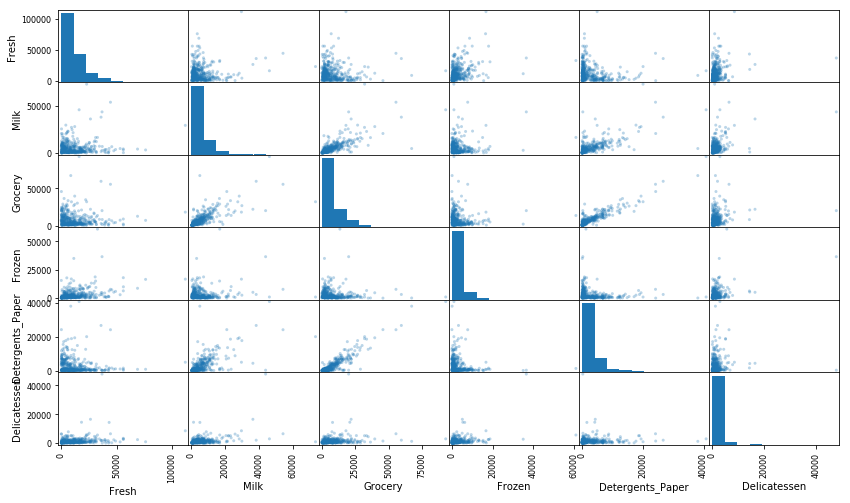

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'hist');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [8]:
corr_data = data.corr()
print(corr_data)


                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


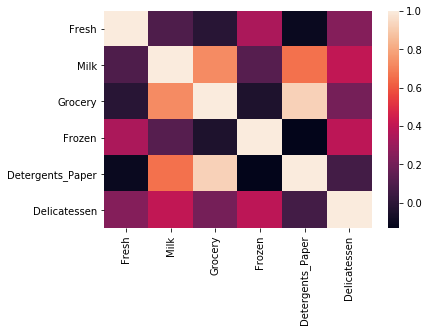

In [9]:
import seaborn as sns
sns.heatmap(corr_data)

**Answer: 
1. From the scatter matrix plot, we can clearly say that data is not at all normally distributed. The data follows exponnetial distributions i.e.every feature of the dataset follows exponential distribution. If you clearly visaluize the hist plot of the features from the diagonal matrix plots shown above, it is clear that all the fetaures are constrained towards zero which signifies that it follows exponential distribution. However, large number of data points of Frozen and delicatessen features are near the zero as compared with other four features. 
2. Certainlly, there is a srong coorelation among Grocery, Detergents_Paper and Milk. The scatter plot of these three features clearly shows that a stronger correlation exist between Grocery and Detergents_Paper as compared to Grocery and milk and Milk and Delicatessen. The same can also be justified by the correlation matrix (a Correlation value of 0.92464 between Grocery and Detergents_Paper) displayed above and the heatmap of the correleation matrix. 
3. It clearly confirms the relevance of features predicted by us in the code snippet related to Question 2. I predicted that when Detergents_Paper is taken as the target variable, the prediction score came out to be 0.7268 which means that 72.68% of this features can be easily derived from the features in the input data sample. This is true because there is a strong correlation between Grocery and Detergents_Paper which signifies that any of the  two features can be easily derived from the other. So, there is no need to consider both features as the relevant features for predicting te customer segments.
4. As explained in the point 1 that all the features are exponentially distributed.**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


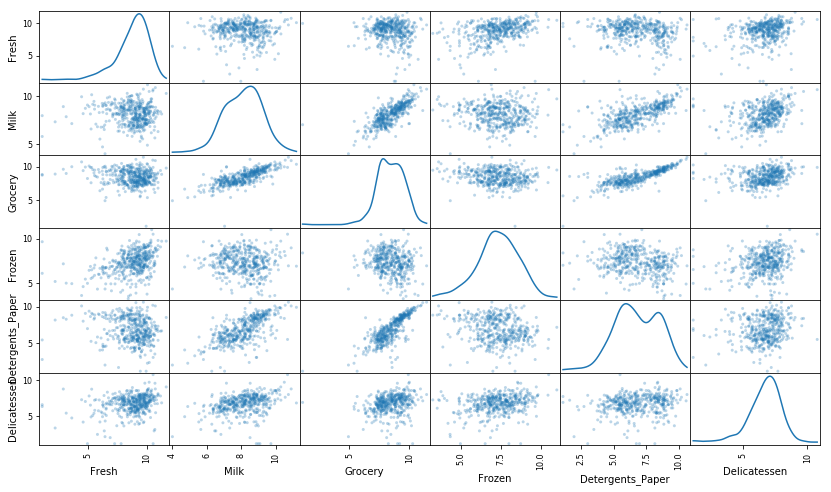

In [10]:
import numpy as np
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.591744,8.512984,8.114624,6.715383,6.456770,6.834109
1,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
2,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data,25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
       
# OPTIONAL: Select the indices for data points you wish to remove
outliers = log_data[(~((log_data >= (Q1 - step)) & (log_data <= (Q3 + step))).all(axis=1))].index

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data.shape

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


(413, 6)

C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


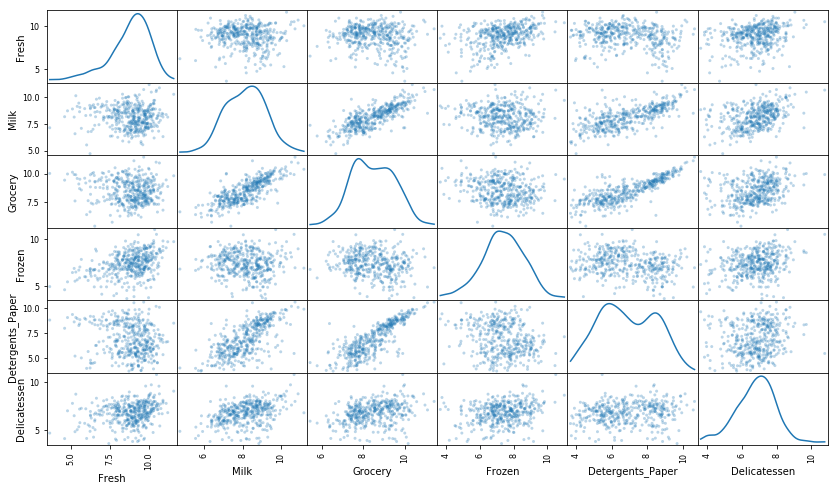

In [13]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:Yes, there are 6 data points that are considered outliers for more than one feature. These are sample no. 66, 75, 142, 154, 289, 338. These outliers need to be removed from the dataset beacuse if we use K-means clustering  to find customer segments without removing the outliers from the dataset, the cluster mean(centres) will shift towards the outlier value. K-means clustering makes sense when the data is densely packed within a cluster. This is because k-means algorithm updates the cluster centers by taking the average of all the data points that are closer to each cluster center. When all the points are packed nicely together, the average makes sense. However, when data have outliers, this can affect the average calculation of the whole cluster. As a result, this will push the cluster center closer to the outlier. For example, we have 5 people with annual salary of 50K dollars, 35K dollars, 65K dollars, 20K dollars, 1 million dollars, the average comes out to be 234K dollars. However, if we dont consider 1 million dollar, the average came out to be 42.5K dollars. Both average values are widely apart. Therefore, it makes sense to remove the outliers when clustering using K-means clustering algorithm.
Reference:https://www.quora.com/How-are-k-means-clustering-algorithms-sensitive-to-outliers**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

array([[-0.16015108,  0.4134695 ,  0.45381413, -0.18399538,  0.736782  ,
         0.14403235],
       [-0.62981659, -0.18896078, -0.10797243, -0.58665132, -0.02098265,
        -0.45974646],
       [-0.75105244,  0.07672417, -0.02202926,  0.60667977, -0.08665401,
         0.23233397],
       [-0.11430027,  0.12081528, -0.0097654 , -0.5026331 , -0.36211479,
         0.76712228],
       [ 0.01360308,  0.76022732,  0.22647047, -0.00663343, -0.4957737 ,
        -0.3531925 ],
       [ 0.01879709,  0.44148418, -0.85470765, -0.03523556,  0.2688576 ,
         0.02621573]])

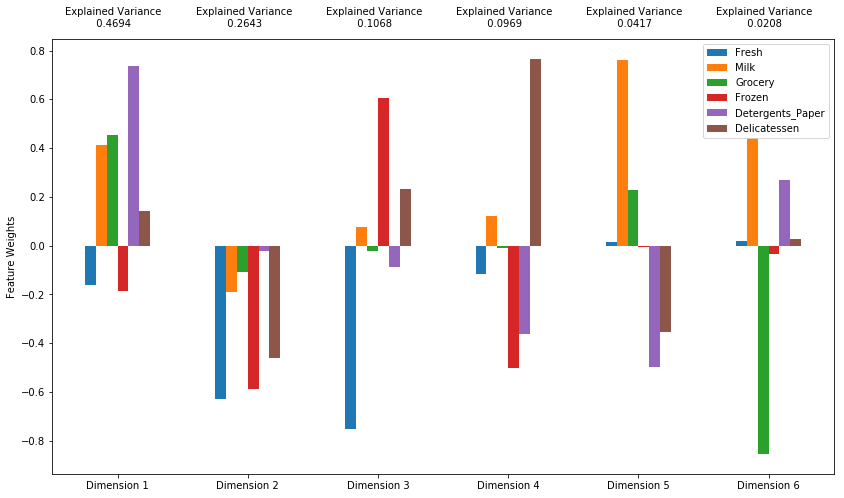

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
pca.components_

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer: In total, 73.37% of the total data is explained by the first two principal componenets (PCs) and 93.74% of the data is represented by the first four PCs. The first dimension explains approximately 47% of the original data variation in which the major feature captured are: Detergents_paper, followed by Grocery and Milk. The first 2 component explains 73.37% variation in the original data where second component represents Fresh, frozen and Delicatessen features. The three components explains 84.05% with the third componnet covering Fresh and Frozen feature the most. The first four components represent 93.74% with Delicatessen, Frozen and detergents fetaures being maximally covered by fourth component. The five components represent 97.91%  with the fifth component representing Milk, Detergents_paper,Delicatessen and all components represent 99.99% i.e. 100% of the original data and the sixth component represent Milk and Grocery component the most. 
In terms of customer spending, the first four components represents a contarst in the purchase of delicatessen and detergents Vs Fresh and frozen items which may act as a deciding factor for customer segmentation. **

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.1703,0.4886,-0.1240,0.5914,0.3904,0.3695
1,2.7444,-3.5297,0.4083,1.2245,0.3719,0.1933
2,3.8085,2.0778,2.2918,0.8427,-0.6777,-0.4102


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca.components_.T

array([[-0.16015108, -0.62981659],
       [ 0.4134695 , -0.18896078],
       [ 0.45381413, -0.10797243],
       [-0.18399538, -0.58665132],
       [ 0.736782  , -0.02098265],
       [ 0.14403235, -0.45974646]])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1703,0.4886
1,2.7444,-3.5297
2,3.8085,2.0778


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

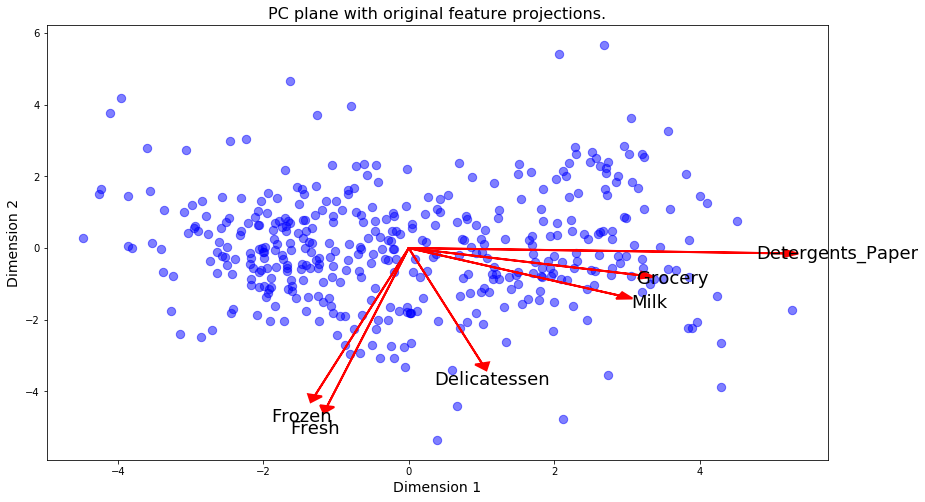

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer: K-means clustering is the simplest algorithm when it comes to unsupervised learning. It is easy to implement, fast and efficient in terms of computational cost.
GAussian mixture is a soft clustering technique where every data point in the dataset belong to every cluster but they have different memebership levels in every cluster. Unlike k-means clustering, it has the shape flexibility that means the clusters can attain any shape.
Considering the dataset we are working upon, Gaussian mixture model will work more appropriately because first, the features in the dataset closely follow normal distribution. The complete dataset is a mixture of features that follows Gaussian distribution. Secondly, the variance of every feature is different as analyzed earlier in this project whereas K-means assumes that the variance of every attribute needs to be similar and spherical otherwise K-means fails to work. Due to the above listed reasons, Gaussian mixture model clustering algrithm is preferred.**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
#print(preds)
# TODO: Find the cluster centers
centers = clusterer.means_
#print(centers)
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

0.4408826160973128


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer: The silhouette score for variation in the number of clusters for GMM clustering are as follows:

No. of clusters --- Silhouettes_score(GMM clustering)
  1.         2-- 0.4408
  2.         3-- 0.378
  3.         5--0.31
  4.         9--0.295
  5.         15--0.262
  6.         21--0.276
  7.         50--0.202

The silhouette score for no. of clusters=2 has the best value which is 0.4408. This is because silhouette score is in range -1 to +1. More the value is close to 1, better the clustering is. So, we choose 2 as the number of clusters with maximum value of Silhouette score**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

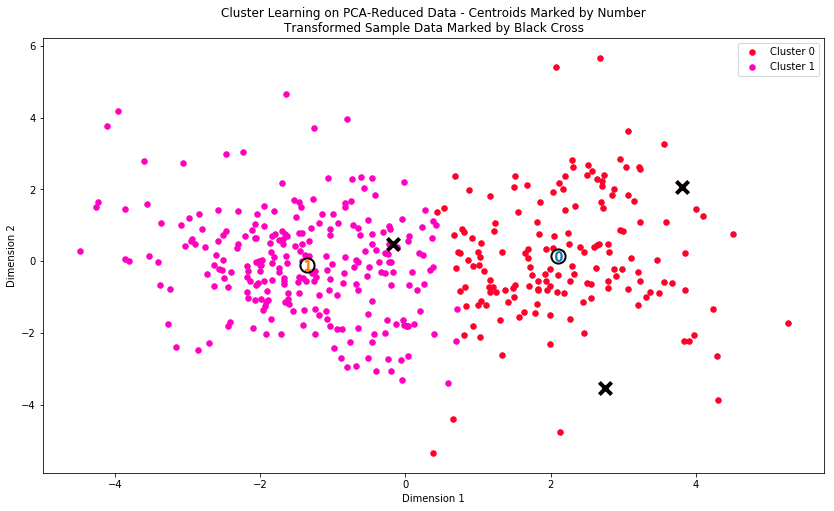

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4452.0,8063.0,12253.0,974.0,4616.0,1118.0
Segment 1,9064.0,2028.0,2628.0,2131.0,365.0,763.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:Considering the purchase cost of each product shown in the dataframe produced by last code snippet and comparing it with the mean value of the dataset, we come to the conclusion that Segment 0 signifies super market/ Retail store because products represented by features like Milk, Grocery, Detergents_paper, Delicatessen are the major products in the supermarket along with some fresh and frozen stuff. The purchase cost of milk, gorcery, detergents_paper and deicatessen are close or above the overall average of the dataset available.
As per my understanding, Segment 1 can be considered as a restaurant where the purchase of fresh and frozen is relatively more than the other products and also the actual purchase cost of these products in Segment 1 is close to average value (not equal or more than the average value of this product in the whole dataset).**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer: As per the results of the last code snippet, Sample 0 belongs to the class of a Restaurant and Sample 1 and 2 belongs to supermarket. The predictions given by me by analysing the data during the start of this project are consistent with the results shown here. Sample 0 to a restaurant, Sample 1 was thought of a wholesale retailer and sample 1 as a super market. Since there are only 2 classes, sample 1 and 2 will come to the same category of super market.**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer: We can not say that changing the delivery service from 5 days to 3 days a week would effect equally to both customer segments. The reason is that the customer segment representing Restaurants/cafe do not have enough storage space for keeping the goods. Secondly, the major purchase of these customers is Fresh food which they need everyday to maintain their quality. Therefore this set of customers will react negatively to the new delivery pattern. The customer segment representing supermarkets/retailer have enough storage space for all kinds of products and hence, the change in the delivery pattern will not effect them and they will react positively to this change.**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer: The wholesale distributor can design a new supervised model with the help of the input data available and the cluster numbers generated by the clustering algorithm as the target variable. First the model is trained using logistic regression (as there are only two customer segments), and then new customer data can be used as a test data to get predictions about their segments by testing it on the trained supervised model. In this way, the wholesale distributor will be able to label the new customers using their estimated product spendings.**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

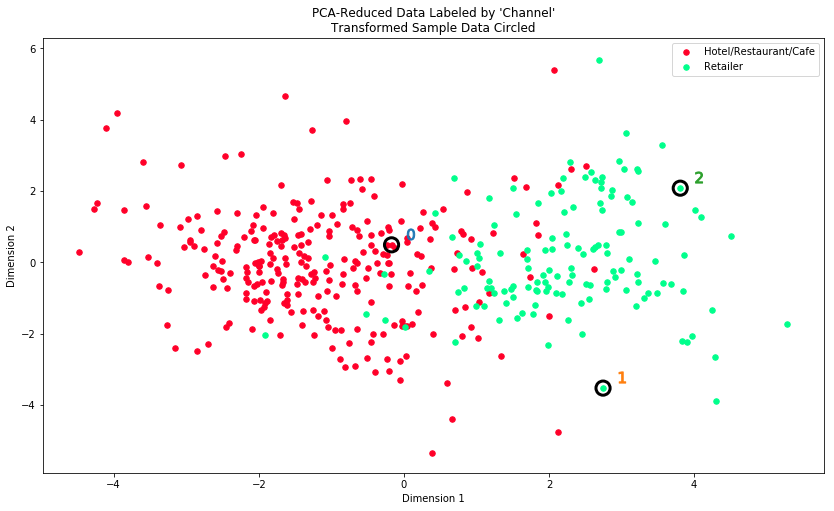

In [90]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer: The clustering algorithm chosen by me which is GMM clustering and the clusters generated by this algorithm very well represent the data as two different segments. If the results of the algorithm are compared with the results shown in the scatter plot generated by the last code snippet, the algorithm was able to identify two classes of the customers. However, the class or cluster 0 can be purely considered as Hotels/cafe/Restaurants whereas the class 1 can not be purely considered as representing Retailers. This segment contains a mix of both the classes. However, I will still consider the classifications are pretty much consistent with the customer segments identified by the GMM algorithm as the algorithm has come up very close to this segmentation without being provided and trained with the labels. **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.